# Initial Exploration of LTO HI .fft File

Terry Bullett provided Kevin McManus with a sample HI .fft file and a graph presumably created from the sample data. This document demonstrates that such a data file can be consumed in Python. The document also successfully approximates the sample graph.

## Import Necessary Python Libraries

In [2]:
import numpy as np
import pandas as pd
import nbconvert

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm


%matplotlib inline
rcParams['figure.figsize'] = [10.0, 10.0]
rcParams['font.size'] = 20

## Read the *.fft* file into a Pandas DataFrame

In [4]:
#path to where the .fft file saved
p = 'C:\\Users\\kevin\\Documents\\LTO Radiometry\\LTO-HI-2018-08-30-23-35-39_1420397kHz.fft'
p

'C:\\Users\\kevin\\Documents\\LTO Radiometry\\LTO-HI-2018-08-30-23-35-39_1420397kHz.fft'

Inspection of the file shows 16 rows of meta data including malformed headers, so need to skip the metadata and supply names for the columns

In [5]:
colnames = ['Spec', 'Line', 'YMD', 'HMS', 'Sec', 'dF', 'F','PWR', 'PWR_dBm']

In [6]:
#read up the data file
df = pd.read_csv(p, names = colnames, header=None, delim_whitespace=True,
                 skiprows=16)

In [7]:
df.head()

,Spec,Line,YMD,HMS,Sec,dF,F,PWR,PWR_dBm
0,1,-8192,2018-08-30,23:35:39,63.678,-5000.00000,1.415397e+06,1.000000,0.000
1,1,-8191,2018-08-30,23:35:39,63.678,-4999.38965,1.415398e+06,1.000000,0.000
2,1,-8190,2018-08-30,23:35:39,63.678,-4998.77930,1.415398e+06,0.552423,-2.577
3,1,-8189,2018-08-30,23:35:39,63.678,-4998.16895,1.415399e+06,0.553812,-2.566
4,1,-8188,2018-08-30,23:35:39,63.678,-4997.55859,1.415399e+06,0.556950,-2.542


In [8]:
df.tail()

,Spec,Line,YMD,HMS,Sec,dF,F,PWR,PWR_dBm
16379,1,8187,2018-08-30,23:35:39,63.678,4996.94824,1.425394e+06,0.737282,-1.324
16380,1,8188,2018-08-30,23:35:39,63.678,4997.55859,1.425395e+06,0.743263,-1.289
16381,1,8189,2018-08-30,23:35:39,63.678,4998.16895,1.425395e+06,0.748037,-1.261
16382,1,8190,2018-08-30,23:35:39,63.678,4998.77930,1.425396e+06,0.701152,-1.542
16383,1,8191,2018-08-30,23:35:39,63.678,4999.38965,1.425396e+06,1.000000,0.000


It appears that the variables `Spec`, `YMD` and `HMS` are constant over the lines (observations) in the file. 
It also looks like the `Line` variable increments by 1 for every line. Here's a plot of Spec versus its row index:

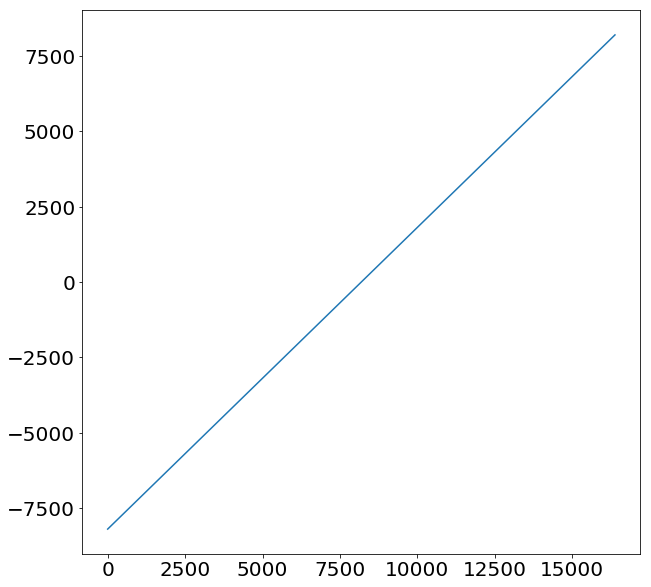

In [9]:
plt.plot(df.index, df.Line)

Here's the data frame in the vicinity of where `Line` crosses zero

In [10]:
wherezero = np.where(df.Line==0)[0][0]
df[(wherezero-5):(wherezero+5)]

,Spec,Line,YMD,HMS,Sec,dF,F,PWR,PWR_dBm
8187,1,-5,2018-08-30,23:35:39,63.678,-3.05176,1.420394e+06,0.681087,-1.668
8188,1,-4,2018-08-30,23:35:39,63.678,-2.44141,1.420395e+06,0.680077,-1.674
8189,1,-3,2018-08-30,23:35:39,63.678,-1.83105,1.420395e+06,0.681276,-1.667
8190,1,-2,2018-08-30,23:35:39,63.678,-1.22070,1.420396e+06,0.683391,-1.653
8191,1,-1,2018-08-30,23:35:39,63.678,-0.61035,1.420396e+06,0.684513,-1.646
8192,1,0,2018-08-30,23:35:39,63.678,0.00000,1.420397e+06,0.684321,-1.647
8193,1,1,2018-08-30,23:35:39,63.678,0.61035,1.420398e+06,0.683676,-1.651
8194,1,2,2018-08-30,23:35:39,63.678,1.22070,1.420398e+06,0.683567,-1.652
8195,1,3,2018-08-30,23:35:39,63.678,1.83105,1.420399e+06,0.684194,-1.648
8196,1,4,2018-08-30,23:35:39,63.678,2.44141,1.420399e+06,0.683896,-1.650


In [11]:
df.describe()

,Spec,Line,Sec,dF,F,PWR,PWR_dBm
count,16384.0,16384.000000,1.638400e+04,16384.000000,1.638400e+04,16384.000000,16384.000000
mean,1.0,-0.500000,6.367800e+01,-0.305176,1.420397e+06,0.672520,-2.093599
std,0.0,4729.797741,1.635719e-11,2886.839441,2.886839e+03,0.171908,2.421062
min,1.0,-8192.000000,6.367800e+01,-5000.000000,1.415397e+06,0.029628,-15.283000
25%,1.0,-4096.250000,6.367800e+01,-2500.152587,1.417897e+06,0.673507,-1.717000
50%,1.0,-0.500000,6.367800e+01,-0.305175,1.420397e+06,0.676113,-1.700000
75%,1.0,4095.250000,6.367800e+01,2499.542237,1.422897e+06,0.683201,-1.654750
max,1.0,8191.000000,6.367800e+01,4999.389650,1.425396e+06,1.274541,1.054000


## Plot the Power Variables
...and set the axes limits to match approximately those of the sample *.png* file.

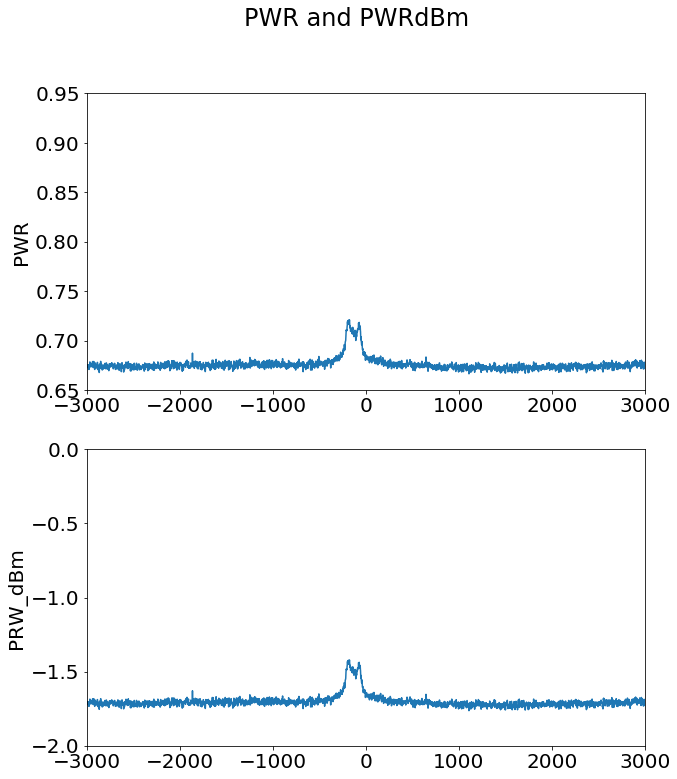

In [12]:
fig = plt.figure(figsize=(10,12))
fig.suptitle('PWR and PWRdBm')
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot('Line', 'PWR',data=df)
ax1.set_xlim(-3000,3000)
ax1.set_ylim(0.65, 0.95)
ax1.set_ylabel('PWR')

ax2.plot('Line', 'PWR_dBm', data=df)
ax2.set_xlim(-3000,3000)
ax2.set_ylim(-2.0,0.0)
ax2.set_ylabel('PRW_dBm')

plt.show()

## Plot F and dF versus Line

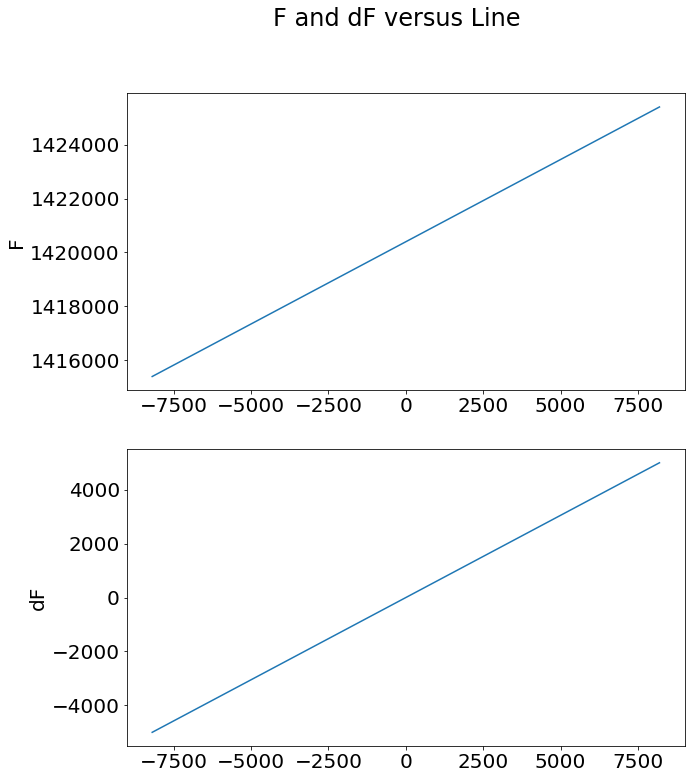

In [13]:
fig = plt.figure(figsize=(10,12))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

fig.suptitle('F and dF versus Line')
ax1.plot('Line', 'F',data=df)
#ax1.set_xlim(-3000,3000)
#ax1.set_ylim(0.65, 0.95)
ax1.set_ylabel('F')

ax2.plot('Line', 'dF', data=df)
#ax2.set_xlim(-3000,3000)
#ax2.set_ylim(-2.0,0.0)
ax2.set_ylabel('dF')

plt.show()